In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from PIL import Image
from collections import Counter
dataset_name = 'dataset_2'

In [3]:
existing_images_files = [f for f in os.listdir(f'./images/{dataset_name}') if not f.startswith('.')]
existing_image_ids = [int(f[:-4]) for f in existing_images_files]
print(f'There are {len(existing_image_ids)} images in the dataset')

There are 5000 images in the dataset


In [4]:
#script to download according to questions
question_file = open('annotations/v2_OpenEnded_mscoco_train2014_questions.json')
questions_all = json.load(question_file) 
questions_all = questions_all['questions']
ann_file = open('annotations/v2_mscoco_train2014_annotations.json')
ann_all = json.load(ann_file) 
ann_all = ann_all['annotations']

df = pd.DataFrame(ann_all)

In [5]:
filtered_df = df[df['image_id'].isin(existing_image_ids)]

# Image distributions by question type

/tmp/ipykernel_625918/670332728.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)
/tmp/ipykernel_625918/670332728.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)


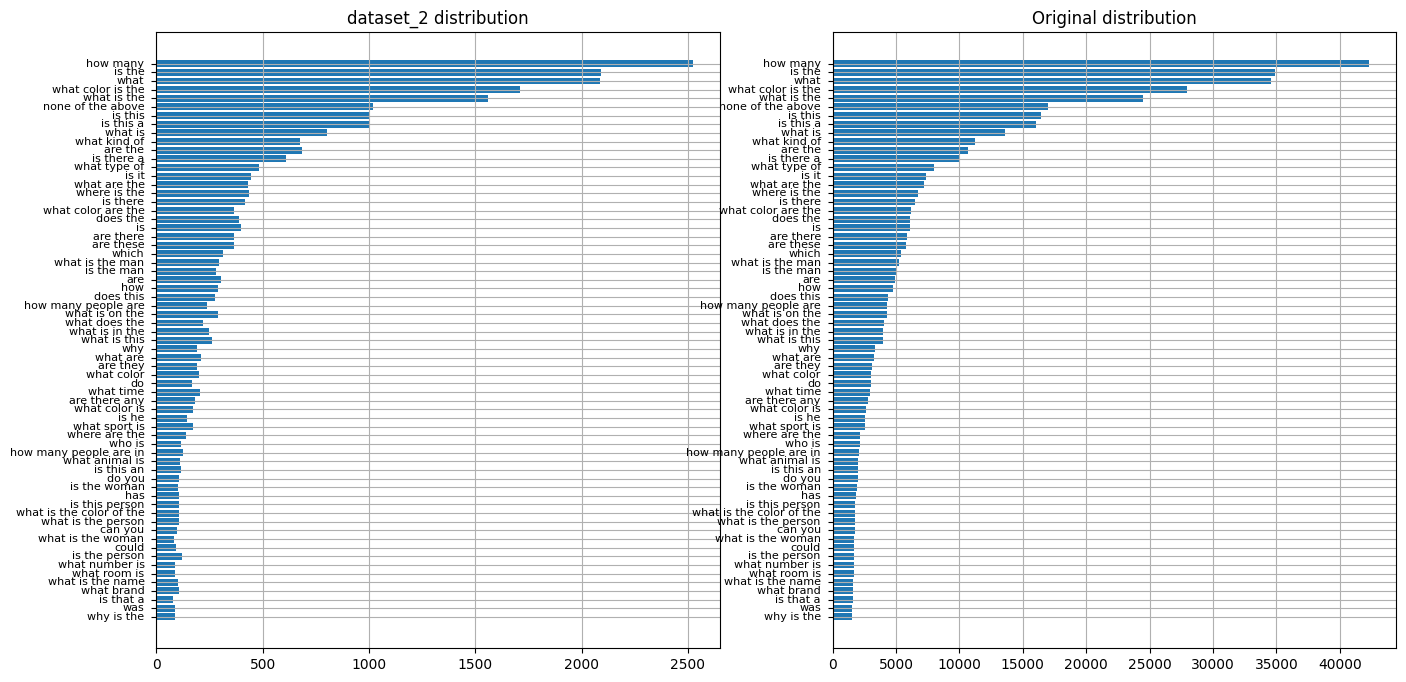

In [6]:
n_questions = filtered_df.groupby('question_type').count()['image_id']
n_questions_general = df.rename(columns = {'image_id':'general'}).groupby('question_type').count()['general']

n_q = pd.DataFrame([n_questions,n_questions_general]).transpose()
n_q.sort_values(by = 'general', inplace = True)
                
# Creating a horizontal bar plot
fig, ax = plt.subplots(1,2, figsize=(16, 8))
ax[0].set_title(f'{dataset_name} distribution')
ax[0].barh(n_q.index, n_q['image_id'])
ax[0].set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)
ax[0].grid(True)
ax[0].tick_params(axis='y', pad=5)

ax[1].set_title('Original distribution')
ax[1].barh(n_q.index, n_q['general'])
ax[1].set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis='y', pad=5)

/tmp/ipykernel_625918/3372486722.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)


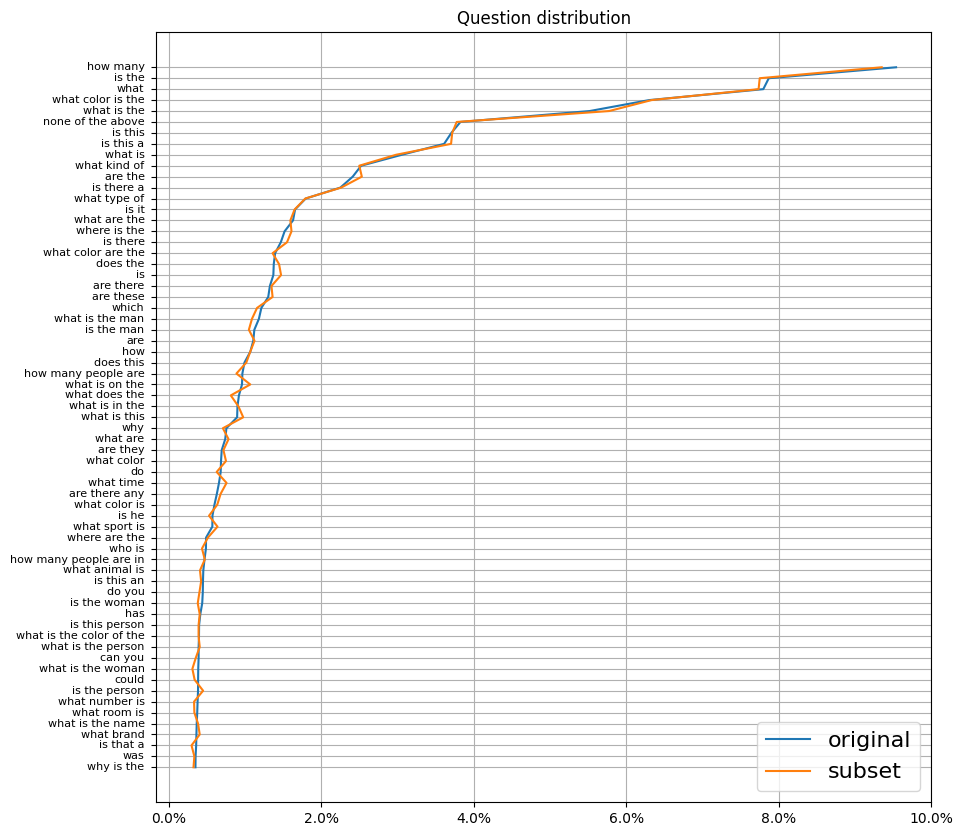

In [10]:
n_questions = filtered_df.groupby('question_type').count()['image_id']/len(filtered_df)
n_questions_general = df.rename(columns = {'image_id':'general'}).groupby('question_type').count()['general']/len(df)

n_q = pd.DataFrame([n_questions,n_questions_general]).transpose()
n_q.sort_values(by = 'general', inplace = True)
                
# Creating a horizontal bar plot

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Question distribution')
ax.plot(n_q['general'], n_q.index)
ax.grid(True)
ax.tick_params(axis='y', pad=5)
ax.set_yticklabels(n_q.index, ha='right', va='center', fontsize=8)

ax.plot(n_q['image_id'], n_q.index)
ax.grid(True)
ax.tick_params(axis='y', pad=5)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.legend(['original','subset'], loc = 'lower right', fontsize=16)
plt.savefig('Datasets.png', dpi=200, bbox_inches='tight')

In [8]:
min(n_questions)

0.0029643902619779896

/tmp/ipykernel_625918/3105731771.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(unique_images_per_type.index, ha='right', va='center', fontsize=8)


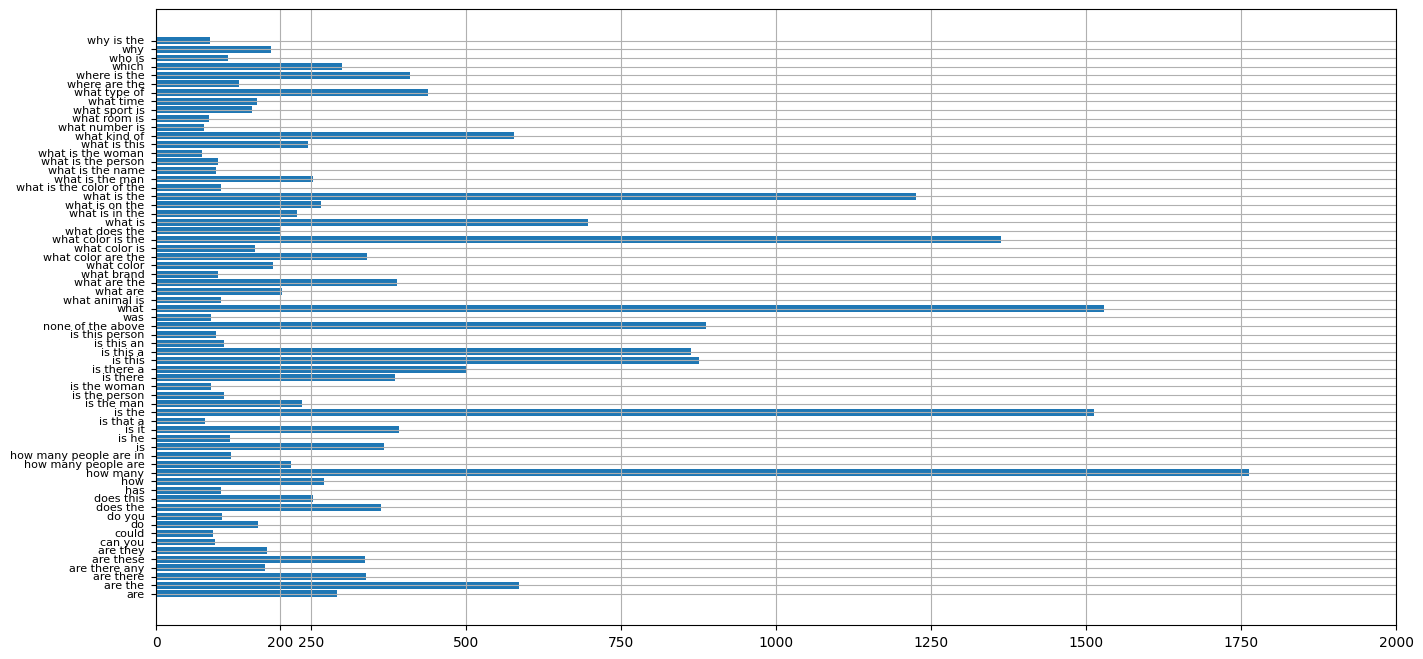

In [9]:
unique_images_per_type = filtered_df.groupby('question_type')['image_id'].nunique()

# Creating a horizontal bar plot
fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.barh(unique_images_per_type.index, unique_images_per_type)

# Adjusting spacing between y ticks
ax.set_yticklabels(unique_images_per_type.index, ha='right', va='center', fontsize=8)
ax.grid(True)
ax.set_xticks(ax.get_xticks().tolist() + [200])
ax.tick_params(axis='y', pad=5)

# Image sizes analysis

In [9]:
sizes_list = list()
for file in existing_images_files:
    path = f'./images/{dataset_name}/{file}'
    img = Image.open(path)
    sizes_list.append(img.size)

In [10]:
pair_counter = Counter(sizes_list)

most_common_pairs = pair_counter.most_common()

print("Most frequent pairs:")
for pair, count in most_common_pairs[:10]:
    print(f"{pair}: {count} times")

Most frequent pairs:
(640, 480): 1013 times
(640, 427): 619 times
(480, 640): 373 times
(640, 426): 275 times
(500, 375): 225 times
(427, 640): 162 times
(640, 428): 134 times
(640, 425): 126 times
(612, 612): 110 times
(375, 500): 88 times


In [11]:
sums = [0, 0]
counts = [0, 0]

for pair in sizes_list:
    for i, value in enumerate(pair):
        sums[i] += value
        counts[i] += 1

averages = [(s / c) if c != 0 else 0 for s, c in zip(sums, counts)]

print("Averages for each position:")
print(averages)

Averages for each position:
[576.628, 484.293]
